# Question Correlation

Correlations will be calculated to determine whether the questions are possibly similar. The rationale is that similar outputs might be sparked by similar questions.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [205]:
io = "/Users/nicholassusantotjandra/Downloads/Keystone-Calculations.xlsx"
# Path of the data file

qns = pd.read_excel(io, skiprows = 4, usecols = "A, AC:AR, BC:BL, BW:CZ, DH:EI, EU:FE") # Questions and scores
total_scores = pd.read_excel(io, skiprows = 4, usecols = "A, FG:FP") # Aggregate scores
feats = pd.read_excel(io, skiprows = 4, usecols = "A, D:H, J") # Features: Age, Gender, Ethnic, Religion, Household Income, Tertiary Institute

In [128]:
qns.head(20)

,#,"I have a certain amount of intelligence, and I can't really do much to change it.",My intelligence is something that I cannot change very much.,"I believe that no matter who you are, you can significantly change your intelligence level.",I believe that you can't really change how intelligent you are.,I believe that you can always substantially change how intelligent you are.,"You can learn new things, but you can't really change your basic intelligence.","No matter how much intelligence you have, whether high or low, you can always change it to quite a degree.",I can change even my basic intelligence level considerably.,"People have a certain amount of talent, and you can't really do much to change it.",...,How participatory are you?,What is your typical standard of work quality?,How well do you manage your time?,How much do you support the team?,How prepared are you usually?,How do you participate in group problem solving?,How aware are you of the team dynamics and your impact on the team?,How supportive are you in a team?,How flexible are you between roles?,How self-reflective are you?
0,af89bb4adc33c1ae7f99f74e78021ddc,7,7,7,7,7,7,7,7,4,...,4,3,3,3,4,4,3,4,4,4
1,9780c4b6faf1183a7ec50761e4d7c172,5,5,5,3,5,5,4,5,6,...,3,2,1,4,3,3,3,4,4,3
2,f0c39a1dd551a921ff24b7a50f0f5603,5,6,6,5,5,5,5,4,5,...,2,3,3,2,4,3,3,4,3,4
3,0305a34ace33dcb2a973af820393b88b,2,3,3,4,4,3,4,4,2,...,3,2,1,3,3,3,3,3,4,3
4,7870cccb9adb914991f9fef4505ff45d,4,5,5,5,5,5,5,5,4,...,3,2,1,2,3,3,3,3,3,2
5,298a212c60053ff06556dee2267a664c,5,5,5,5,5,5,5,5,4,...,3,2,1,3,3,3,2,3,3,2
6,de9a057d546e3e55e88cbe73a09a7e36,3,3,7,5,4,5,5,5,5,...,2,3,1,3,3,3,4,4,4,3
7,b7ee0906e6d7fc0e67e9544c2a9a19e2,4,3,3,4,5,2,3,3,2,...,2,3,3,3,3,3,2,3,3,2
8,88b494b2bc562235875f99c18ea014b2,3,5,5,5,5,4,5,4,3,...,3,3,1,3,3,3,2,3,3,4
9,2247df38bfe4727488d4bd1cb47e0369,5,6,5,5,5,6,6,5,4,...,3,4,4,3,4,4,3,3,2,3


In [127]:
pearsonr([x for x in qns.iloc[:,1]],[x for x in qns.iloc[:,2]])

(0.7394699191974186, 4.403847757063711e-81)

In [185]:
num_qns = qns.shape[1]-1
cor_threshold = 0.65
cor_mat = np.zeros([num_qns,num_qns])
correlations = np.zeros([num_qns,num_qns])
for i in range(1,num_qns+1):
    for j in range(1,num_qns+1):
        if j<i:
            col_i = [x for x in qns.iloc[:,i]]
            col_j = [x for x in qns.iloc[:,j]]
            correlations[i-1,j-1] = pearsonr(col_i,col_j)[0]
            cor_mat[i-1,j-1] = correlations[i-1,j-1] > cor_threshold
print(cor_mat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [196]:
pairs = np.argwhere(cor_mat)+1
Q1 = [str(x[0]) for x in pairs]
Q2 = [str(x[1]) for x in pairs]

for i in range(len(Q1)):
    print("Question "+ Q2[i] +" and Question "+ Q1[i] +" are highly correlated")
print("These pairs might be similar questions. Changes may be needed.")
print("Questions 1 to 16 is G1")
print("Questions 17 to 26 is G2")
print("Questions 27 to 36 is C1")
print("Questions 37 to 46 is C2")
print("Questions 47 to 51 is S1")
print("Questions 52 to 56 is S2")
print("Questions 57 to 63 is S3")
print("Questions 64 to 79 is T1")
print("Questions 80 to 84 is P2")
print("Questions 85 to 95 is T2")

Question 1 and Question 2 are highly correlated
Question 9 and Question 10 are highly correlated
Question 10 and Question 14 are highly correlated
Question 15 and Question 16 are highly correlated
Question 40 and Question 41 are highly correlated
Question 43 and Question 44 are highly correlated
Question 47 and Question 48 are highly correlated
Question 47 and Question 49 are highly correlated
Question 48 and Question 49 are highly correlated
Question 48 and Question 50 are highly correlated
Question 49 and Question 50 are highly correlated
Question 53 and Question 54 are highly correlated
Question 54 and Question 56 are highly correlated
Question 59 and Question 63 are highly correlated
Question 65 and Question 66 are highly correlated
Question 66 and Question 68 are highly correlated
Question 71 and Question 72 are highly correlated
Question 74 and Question 75 are highly correlated
Question 64 and Question 80 are highly correlated
Question 65 and Question 81 are highly correlated
Que

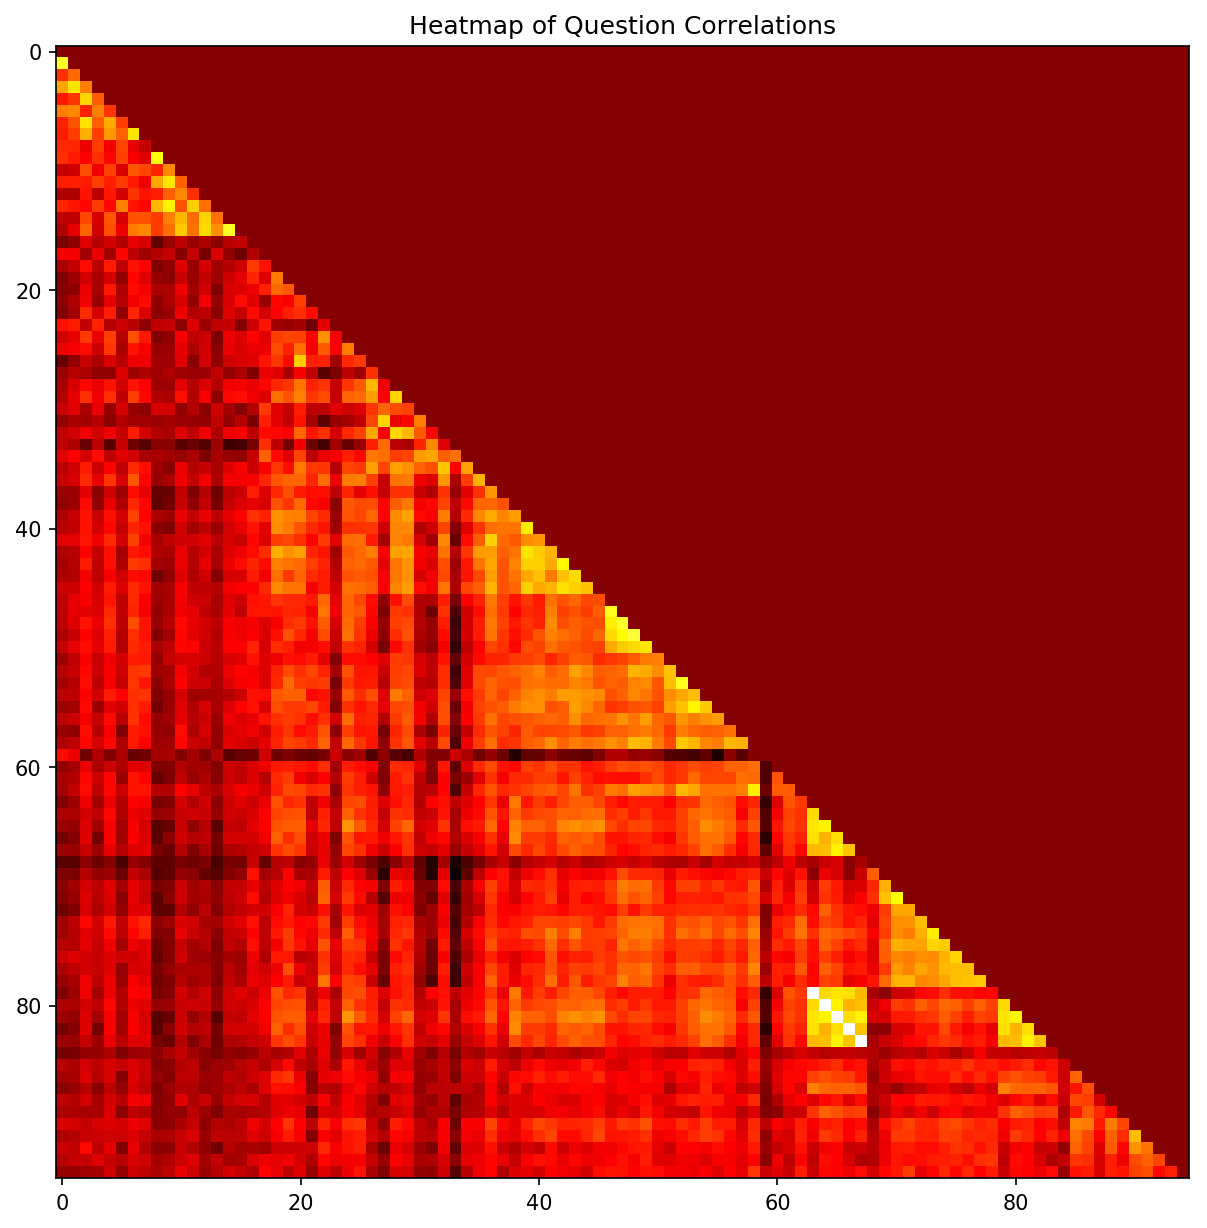

Notice that the correlations tend to be larger close to the diagonals.
It is due to questions of a group having significantly large correlations to each other.


In [201]:
plt.figure(num=None, figsize=(10, 10), dpi=150)
plt.imshow(correlations, cmap='hot', interpolation='nearest')
plt.title("Heatmap of Question Correlations")
plt.show()

print("Notice that the correlations tend to be larger close to the diagonals.")
print("It is due to questions of a group having significantly large correlations to each other.")